In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm 
%matplotlib inline
from numpy import ma

<img = "D3Q19">
<img src="D3Q19.png",width=500,height=100>


# Sin implementar las condiciones de frontera periodicas sobre las caras superior e inferior

CPU times: user 1.15 s, sys: 18.5 ms, total: 1.17 s
Wall time: 1.2 s


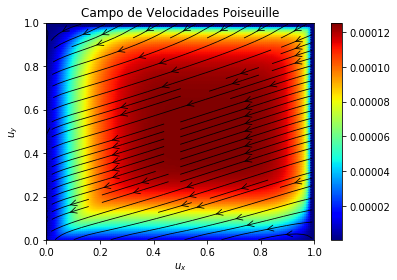

In [328]:
%%time

ux = np.transpose(np.loadtxt('vx.dat', unpack = True))
uy = np.transpose(np.loadtxt('vy.dat', unpack = True))
#uz = np.transpose(np.loadtxt('vz.dat', unpack = True))
x = np.transpose(np.loadtxt('x.dat', unpack = True))
y = np.transpose(np.loadtxt('y.dat', unpack = True))
#z = np.transpose(np.loadtxt('z.dat', unpack = True))
rho = np.transpose(np.loadtxt('rho.dat', unpack = True))

np.shape(ux)

plt.figure()
plt.title("Campo de Velocidades Poiseuille")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux, uy)
plt.xlim(0,1)
plt.ylim(0,1)
Q = plt.quiver(x, y, ux,uy, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x, y, ux, uy, color="k", linewidth=0.8,density=1.0, arrowstyle='->', arrowsize=1.5)

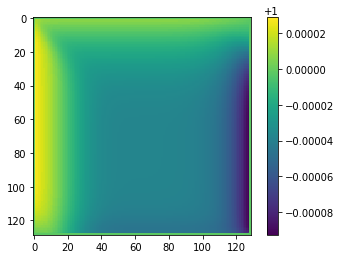

In [329]:
plt.imshow(rho)
plt.colorbar()

## Graficas de a plano por 3D



Se intenta hacer cortes para ver la evolución en cada capa del fluido 

In [387]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from itertools import product
from matplotlib import cm
from scipy.integrate import ode as ode
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
cmfunc = lambda x: 255*cm.jet(x)
pl_BrBG = [ [x, "rgb(%d,%d,%d)"%(255*cmfunc(x)[0],255*cmfunc(x)[1],255*cmfunc(x)[2])] for x in np.linspace(0,1,11) ]


def get_the_slice(x,y,z, surfacecolor,  colorscale=pl_BrBG, showscale=False):
    return go.Surface(x=x,# https://plot.ly/python/reference/#surface
                   y=y,
                   z=z,
                   surfacecolor=surfacecolor,
                   colorscale=colorscale,
                   showscale=showscale,
                   name="")



def get_lims_colors(surfacecolor):# color limits for a slice
    return np.min(surfacecolor), np.max(surfacecolor)




#x = np.linspace(-2,2, 20)
#y = np.linspace(-2,2, 20)
x,y = np.meshgrid(x,y)
z = np.zeros(x.shape)

surfcolor_z = ux
slice_z = get_the_slice(x,y,z, surfcolor_z)



#x=np.linspace(-2,2, 20)
z=np.linspace(-2,2, 20)
x,z=np.meshgrid(x,y)

y=np.zeros(x.shape)

surfcolor_y = 1
slice_y = get_the_slice(x,y,z, surfcolor_y)


vmin,vmax = -3,3
slice_z.update(cmin=vmin, cmax=vmax)
slice_y.update(cmin=vmin, cmax=vmax, showscale=True,
               colorbar=go.ColorBar(title='Potencial [alguna]'),)

data = []

data.append(slice_z)
data.append(slice_y)


axis = dict(showbackground=True, 
            backgroundcolor="rgb(230, 230,230)",
            gridcolor="rgb(255, 255, 255)",      
            zerolinecolor="rgb(255, 255, 255)",  
            )

layout = go.Layout(
         width=700,
         height=700,
         scene=go.Scene(xaxis=go.XAxis(axis),
                        yaxis=go.YAxis(axis), 
                        zaxis=go.ZAxis(axis, range=[-2,2]), 
                        aspectratio=dict(x=1, y=1, z=1),
                        ),
        )



fig = dict(data=data,layout=layout)
py.iplot(fig)
plt.show()

In [34]:
np.shape(x)
x

array([0.        , 0.00775194, 0.01550388, 0.02325581, 0.03100775,
       0.03875969, 0.04651163, 0.05426357, 0.0620155 , 0.06976745,
       0.07751938, 0.08527132, 0.09302326, 0.1007752 , 0.1085271 ,
       0.1162791 , 0.124031  , 0.1317829 , 0.1395349 , 0.1472868 ,
       0.1550388 , 0.1627907 , 0.1705426 , 0.1782946 , 0.1860465 ,
       0.1937985 , 0.2015504 , 0.2093023 , 0.2170543 , 0.2248062 ,
       0.2325581 , 0.2403101 , 0.248062  , 0.255814  , 0.2635659 ,
       0.2713178 , 0.2790698 , 0.2868217 , 0.2945736 , 0.3023256 ,
       0.3100775 , 0.3178295 , 0.3255814 , 0.3333333 , 0.3410853 ,
       0.3488372 , 0.3565891 , 0.3643411 , 0.372093  , 0.379845  ,
       0.3875969 , 0.3953488 , 0.4031008 , 0.4108527 , 0.4186046 ,
       0.4263566 , 0.4341085 , 0.4418605 , 0.4496124 , 0.4573644 ,
       0.4651163 , 0.4728682 , 0.4806201 , 0.4883721 , 0.496124  ,
       0.503876  , 0.5116279 , 0.5193799 , 0.5271318 , 0.5348837 ,
       0.5426357 , 0.5503876 , 0.5581396 , 0.5658914 , 0.57364

In [38]:
np.linspace(0,1,128)

array([0.        , 0.00787402, 0.01574803, 0.02362205, 0.03149606,
       0.03937008, 0.04724409, 0.05511811, 0.06299213, 0.07086614,
       0.07874016, 0.08661417, 0.09448819, 0.1023622 , 0.11023622,
       0.11811024, 0.12598425, 0.13385827, 0.14173228, 0.1496063 ,
       0.15748031, 0.16535433, 0.17322835, 0.18110236, 0.18897638,
       0.19685039, 0.20472441, 0.21259843, 0.22047244, 0.22834646,
       0.23622047, 0.24409449, 0.2519685 , 0.25984252, 0.26771654,
       0.27559055, 0.28346457, 0.29133858, 0.2992126 , 0.30708661,
       0.31496063, 0.32283465, 0.33070866, 0.33858268, 0.34645669,
       0.35433071, 0.36220472, 0.37007874, 0.37795276, 0.38582677,
       0.39370079, 0.4015748 , 0.40944882, 0.41732283, 0.42519685,
       0.43307087, 0.44094488, 0.4488189 , 0.45669291, 0.46456693,
       0.47244094, 0.48031496, 0.48818898, 0.49606299, 0.50393701,
       0.51181102, 0.51968504, 0.52755906, 0.53543307, 0.54330709,
       0.5511811 , 0.55905512, 0.56692913, 0.57480315, 0.58267

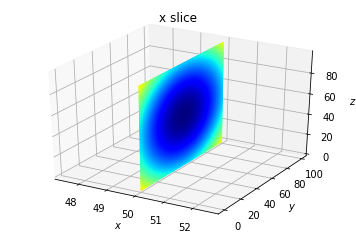

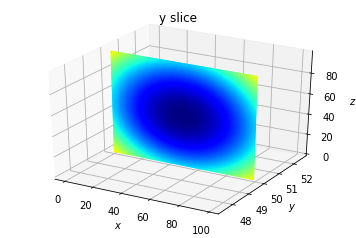

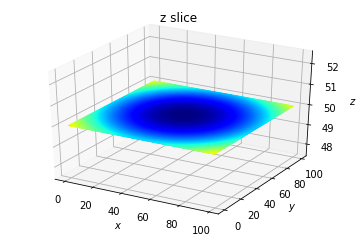

In [173]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.jet

    x_cut = array[n_x//2,:,:]
    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("x slice")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    y_cut = array[:,n_y//2,:]
    X, Z = np.mgrid[0:n_x, 0:n_z]
    Y = n_y//2 * np.ones((n_x, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((y_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("y slice")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    z_cut = array[:,:,n_z//2]
    X, Y = np.mgrid[0:n_x, 0:n_y]
    Z = n_z//2 * np.ones((n_x, n_y))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((z_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("z slice")
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    
    plt.show()


n_pts = 100
r_square = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)
plot_3D_array_slices(r_square)

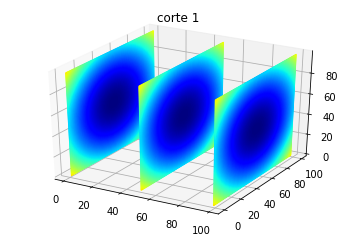

In [45]:
def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.jet

    x_cut = array[n_x//2,:,:]
    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z)) +49
    X1 = n_x//2 * np.ones((n_y, n_z)) 
    X2 = n_x//2 * np.ones((n_y, n_z)) -49
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.plot_surface(X1, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.plot_surface(X2, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("corte 1")
    
    plt.show()


n_pts = 100
r_square = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)
plot_3D_array_slices(r_square)

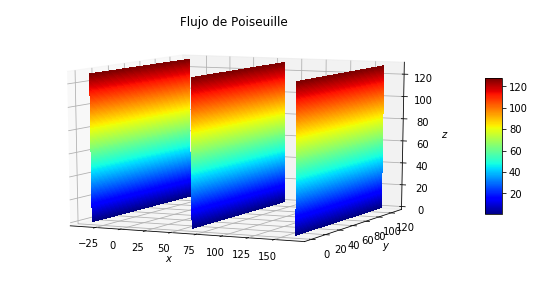

In [170]:
n_pts = 129
array = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)


min_val = array.min()
max_val = array.max()
n_x, n_y, n_z = array.shape
colormap = plt.cm.jet

#x_cut = array[n_x//2,:,:]
Y, Z = np.mgrid[0:n_y, 0:n_z]
X = n_x//2 * np.ones((n_y, n_z)) +100
X1 = n_x//2 * np.ones((n_y, n_z)) 
X2 = n_x//2 * np.ones((n_y, n_z)) -100
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet,linewidth =0, antialiased = False)
ax.plot_surface(X1, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet, antialiased = False)
ax.plot_surface(X2, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet, antialiased = False)
ax.set_title("Flujo de Poiseuille")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.view_init(elev = 10, azim= -65)
fig.colorbar(p, shrink=0.5, aspect=8)

plt.show()









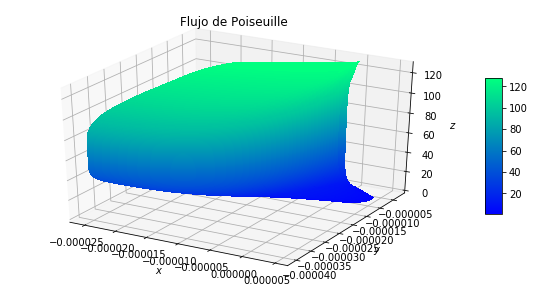

In [189]:
n_pts = 129
array = ux,uy,Z


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(ux, uy, Z, rstride=1, cstride=1, cmap = cm.winter, antialiased = False)
ax.set_title("Flujo de Poiseuille")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
#ax.view_init(elev = 90, azim= 90)
fig.colorbar(p, shrink=0.5, aspect=8)

plt.show()




In [226]:
'''
==============
3D quiver plot
==============

Demonstrates plotting directional arrows at points on a 3d meshgrid.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
X, Y, Z = np.meshgrid(x,
                      y,
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = X
v = 0
w = 0


p = ax.quiver(X, Y, Z, u, v, w, M,cmap = plt.cm.jet ,length=0.1, normalize=True)
ax.set_title("Flujo de Poiseuille")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.view_init(elev = 10, azim= -65)
norm = matplotlib.colors.Normalize()
norm.autoscale(M)
cm = matplotlib.cm.copper
sm = matplotlib.cm.ScalarMappable(cmap= plt.cm.jet, norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.show()


ValueError: object too deep for desired array

In [218]:
np.shape(np.arange(-0.8, 1, 0.8))

(3,)

In [219]:
np.shape(x)

(129,)

In [147]:
np.shape(ux)

(129, 129)